In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
files = {}
files_numbers = ["1.0", "1.5", "2.0", "2.5", "3.0", "3.5", "4.0", "4.5", "5.0"]
iterations = [0,1,2,3,4]

In [20]:
# join every data frame in df
for num in files_numbers:
    for i in iterations:
        aux = pd.read_csv(f'../src/main/resources/output/velocity/diffVz/velocity_140_{i}_vz_{num}.csv')
        #take only the last row
        aux = aux.tail(1)
        if num not in files:
            files[num] = aux.rename(columns={'Time':'Time','Zombies': f'FZ'})
        else:
            aux = aux.rename(columns={'Time':'Time','Zombies': f'FZ'})
            #append the new data frame to the existing one considering index as Time if Nan then 1
            files[num] = files[num].append(aux)
    #calculate the mean of time
    files[num]['Vz'] = num
    files[num][f'mean'] = files[num]['Time'].mean()
    #calculate the standard deviation of time
    files[num][f'std'] = files[num]['Time'].std()
    
    #drop all columns except mean and std and Vz
    files[num] = files[num].drop(columns=['Time', 'FZ'])
    #take only the first row
    files[num] = files[num].head(1)
    
files

/var/folders/ld/9r7b_z792271p_ycsc8k24240000gn/T/ipykernel_65757/1596250104.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  files[num] = files[num].append(aux)
/var/folders/ld/9r7b_z792271p_ycsc8k24240000gn/T/ipykernel_65757/1596250104.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  files[num] = files[num].append(aux)
/var/folders/ld/9r7b_z792271p_ycsc8k24240000gn/T/ipykernel_65757/1596250104.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  files[num] = files[num].append(aux)
/var/folders/ld/9r7b_z792271p_ycsc8k24240000gn/T/ipykernel_65757/1596250104.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  files[num] = files[n

{'1.0':        Vz     mean       std
 1437  1.0  185.085  5.226046,
 '1.5':        Vz     mean        std
 1033  1.5  144.585  20.456254,
 '2.0':        Vz     mean        std
 1071  2.0  118.295  12.850795,
 '2.5':       Vz     mean        std
 985  2.5  112.825  15.374492,
 '3.0':       Vz     mean        std
 710  3.0  102.055  10.622888,
 '3.5':       Vz   mean       std
 896  3.5  92.73  7.051182,
 '4.0':       Vz      mean      std
 910  4.0  96.32625  7.95182,
 '4.5':        Vz       mean       std
 1026  4.5  98.763333  9.434661,
 '5.0':        Vz    mean       std
 1140  5.0  97.437  6.798736}

In [21]:
df = pd.DataFrame(columns=['Vz','mean','std'])
for num in files_numbers:
    #append num, mean and std to df
    df = df.append(files[num])
df

/var/folders/ld/9r7b_z792271p_ycsc8k24240000gn/T/ipykernel_65757/3330519987.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(files[num])
/var/folders/ld/9r7b_z792271p_ycsc8k24240000gn/T/ipykernel_65757/3330519987.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(files[num])
/var/folders/ld/9r7b_z792271p_ycsc8k24240000gn/T/ipykernel_65757/3330519987.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(files[num])
/var/folders/ld/9r7b_z792271p_ycsc8k24240000gn/T/ipykernel_65757/3330519987.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(files[num])
/var/folders/ld/9r7b_z79

,Vz,mean,std
1437,1.0,185.085000,5.226046
1033,1.5,144.585000,20.456254
1071,2.0,118.295000,12.850795
985,2.5,112.825000,15.374492
710,3.0,102.055000,10.622888
896,3.5,92.730000,7.051182
910,4.0,96.326250,7.951820
1026,4.5,98.763333,9.434661
1140,5.0,97.437000,6.798736


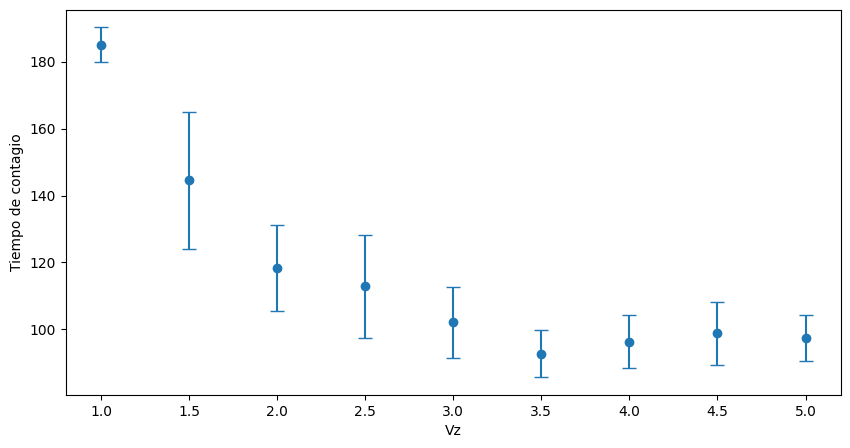

In [23]:
# graph of error bars

plt.figure(figsize=(10,5))
#error bar with only Nh values in x axis
plt.errorbar(df['Vz'], df['mean'], yerr=df['std'], fmt='o', capsize=5)
#with x= 0 in the intersection
plt.xlabel('Vz')
plt.ylabel('Tiempo de contagio')
#export plt to png in outputs folder from data_analysis
plt.savefig('./outputs/vz_velocity_whole_infection.png')
plt.show()